In [1]:
import pandas as pd

df_shrine = pd.read_csv("shrine.csv")
df_deity = pd.read_csv("deity.csv")
df_relation = pd.read_csv("shrine_deity.csv")

In [2]:
import folium

m = folium.Map(location=[35.63, 139.72], zoom_start=13)

for _, row in df_shrine.iterrows():
    popup = f"<b>{row['name_en']}</b><br>{row['note_summary_en']}"
    folium.Marker([row["lat"], row["lng"]], popup=popup).add_to(m)

m


![Shrine Network](https://github.com/satoshi-create/complexity-and-network-webdesign/blob/create/shrine-network/projects/from-rdb-to-network/shrine-network/public/images/shrine_map_meguro-river.PNG?raw=1)


In [4]:
import networkx as nx

G = nx.Graph()

# ノード：神社
for _, row in df_shrine.iterrows():
    G.add_node(row["id"], name=row["name_en"], lat=row["lat"], lng=row["lng"])

deity_id_to_name = dict(zip(df_deity["id"], df_deity["name_en"]))

# 同じ祭神を祀る神社同士をエッジで接続
from itertools import combinations

# deity_idごとに、どの神社がその神を祀っているかグループ化
for deity_id, group in df_relation.groupby("deity_id"):
    shrine_ids = group["shrine_id"].tolist()
    deity_name = deity_id_to_name[deity_id]
    # その神を共有している神社同士の全ての組み合わせにエッジを追加
    for a, b in combinations(shrine_ids, 2):
        # deity_id の情報をエッジ属性として追加（後で名前に変換可能）
        G.add_edge(a, b,label=deity_name)


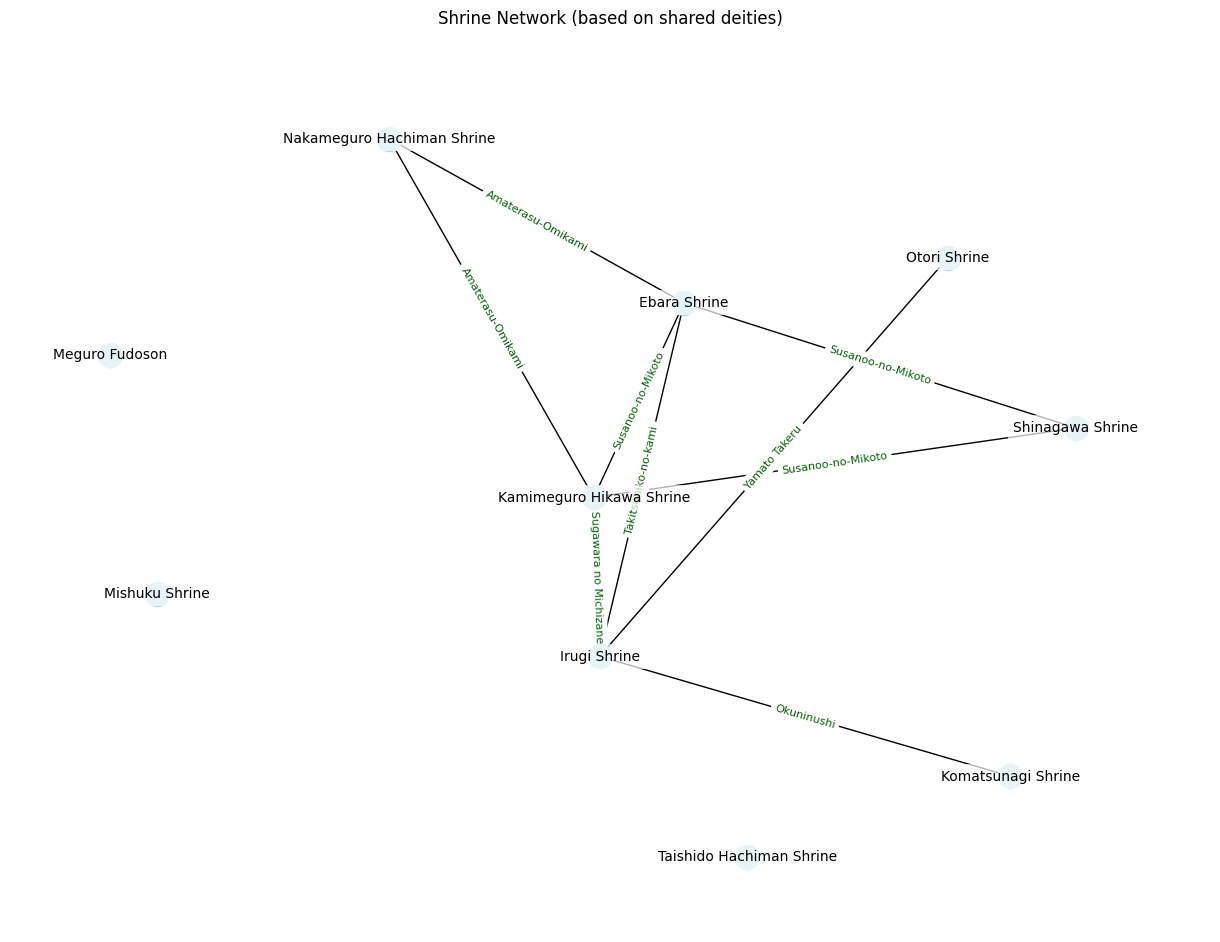

In [5]:
import matplotlib.pyplot as plt

# ID → 名称変換マップ
shrine_labels = {row["id"]: row["name_en"] for _, row in df_shrine.iterrows()}

edge_labels = nx.get_edge_attributes(G, 'label')

# springレイアウトで配置
pos = nx.spring_layout(G, k=1.6, seed=42)

plt.figure(figsize=(12, 9))
nx.draw(G, pos, labels=shrine_labels, with_labels=True, node_color="lightblue",font_size=10,bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_size=8,
    font_color="darkgreen"
)
plt.margins(0.1)
plt.title("Shrine Network (based on shared deities)")
plt.savefig("shrine_network_demo_with_deity_en.png", dpi=300, bbox_inches='tight')
plt.show()
